# Chapter X: Random process

## **A reminder of: Probability and probability mass function**
Probability: Webster's disctionary: "The chance that a given event will occur". Some classic well-known probabilites:

* Obtain head as a result of flipping a coin: 0.5

* Obtain two after rolling a die: 0.167


In [2]:
import random

# Simulate the probability of obtaining head when flipping a coin
num_head = 0
for i in range(100000):
    n = random.randint(1, 2) #Se genera un número aleatorio utilizando random.randint(1, 2).
                            #Esta función genera un número entero aleatorio entre 1 y 2 (ambos inclusive).
    if n == 1:
        num_head += 1 
prob_head = num_head / 100000 
#se calcula la probabilidad dividiendo el número de veces que se obtuvo cara (num_head)
#entre el número total de lanzamientos (100,000)
print("Probability of obtaining head:", prob_head)

Probability of obtaining head: 0.50328


In [3]:
# Simulate the probability of rolling a 2 on a die
num_two = 0
for i in range(100000):
    n = random.randint(1, 6)
    if n == 2:
        num_two += 1
prob_two = num_two / 100000
print("Probability of rolling a 2:", prob_two)

Probability of rolling a 2: 0.16726


The probability of an event give us a very good idea of the behaviour of the experiment: https://youtu.be/Q5nCtgcL4jU?t=86. Anotther classical example: flip the coin 1000 times. What is the expected behaviour of this experiment? Finally, the probabiliy theory gives us the idea of the behaviour in "long run".

Flipping a coin generates two possible outcomes: **heads and tails**. In the case of coins, heads and tals each have the same probability of $\frac{1}{2}$. When the number of flipping is increased, the number of outcomes can change according to all the scenarios.

For instance, if we realize two experiments, the probability of a head on the first flip and a head on the second flip is the product $(\frac{1}{2})(\frac{1}{2})=\frac{1}{4}$.

The four possible results can be classified finding the number of heads (or tails) that come up. So, if we want to find the probability when just one head appears in the two experiments, the result will be $\frac{1}{4}+\frac{1}{4}=\frac{1}{2}$.

This experiment is an example of **binomial distributions**.

The number of telephone callers can be modeled by assigning a probability p to each person being on the phone anytime in the given 10-minute interval and assuming that whether one or more persons are on the phone does not affect the probability of others being on the phone. We can make an analogy with flipping a coin. Heads: person on the phone - Tail: person not on the phone.

$$P[k]=\binom{N}{k}p^k(1-p)^{N-k}$$
$$\binom{N}{k} = \frac{N!}{k!(N-k)!}$$
for $k=0,1,...,N$.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Probability of k = 5 for N = 10 of obtaining head

# La función comb(n, k) calcula el coeficiente binomial "n choose k"
k = 5
N = 10
prob = comb(N, k) * 0.5**k * (1-0.5)**(N-k)
#comb(N, k) calcula el coeficiente binomial "N choose k".
#0.5**k es la probabilidad de obtener exactamente k caras en los k lanzamientos deseados.
#(1-0.5)**(N-k) es la probabilidad de obtener (N-k) cruces en los (N-k) 
print(prob)

0.24609375


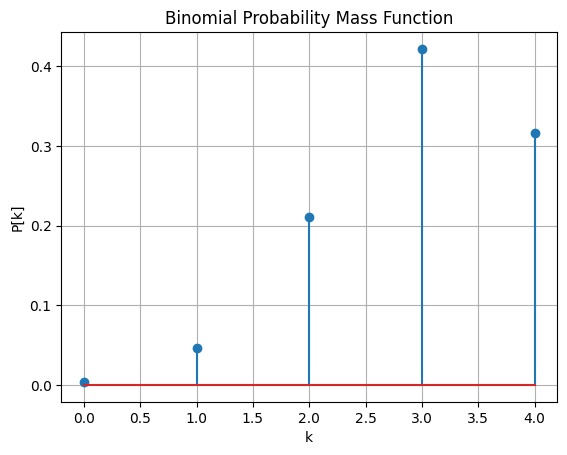

In [5]:
# Obtain the probability mass function for p = 0.75 and N = 4
N = 4
p = 0.75

K = np.arange(N+1) #array para el numero de exitos
probs = np.zeros_like(K, dtype=float) #(inicializa prob)

for k in K:
    probs[k]= comb(N, k) * p**k * (1-p)**(N-k)

plt.stem(K, probs)
plt.xlabel("k")
plt.ylabel("P[k]")
plt.title("Binomial Probability Mass Function")
plt.grid(True)
plt.show()

Example: Suppose you are working on an ultrasound imaging system and want to analyze the probability of correctly detecting the presence of a target (for example a tumour) within an ultrasound image. Let's assume that the probability of correctly detecting the target in any given image is 0.8, and you plan to analyze 50 ultrasound images.

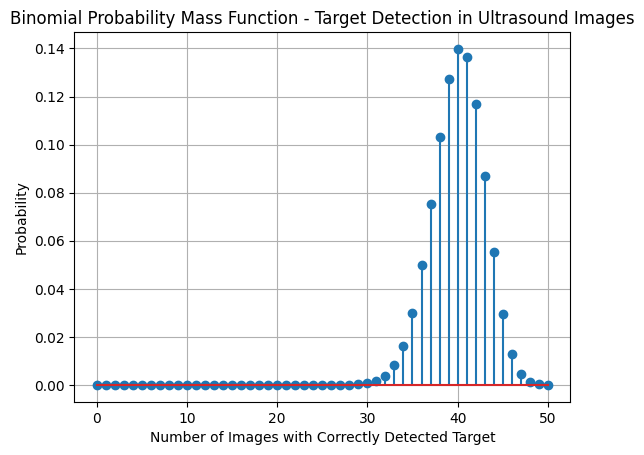

In [8]:
# Parameters
N = 50    # Number of ultrasound images analyzed
p = 0.8   # Probability of correctly detecting the target

K = np.arange(N+1) #arreglo K que contiene los posibles valores de "éxito"
                   #en la detección correcta del objetivo, que van desde 0 hasta N
probs = np.zeros_like(K, dtype=float) #almacena las probabilidades correspondientes a cada valor de K.

for k in K:
    probs[k]= comb(N, k) * p**k * (1-p)**(N-k)

plt.stem(K, probs)
plt.xlabel('Number of Images with Correctly Detected Target');
plt.ylabel('Probability');
plt.title('Binomial Probability Mass Function - Target Detection in Ultrasound Images');

plt.grid(True)
plt.show()

Note that you are able to identify the random variable X(s) (The number of images with correctly detected targets) and the sample space S ({0, 1, 2, ..., 50}).
What is the probability of 40? 
Easy, this is equal to 0.14 (aprox., check the plot)
As this is a Probability Mass Function, each point represent the probability of the corresponding value in the sample space.

## **A reminder of: The probability density function (pdf)**
Suppose you are studying the blood pressure distribution in a population. Let's assume that the blood pressure of individuals follows a Gaussian distribution with a mean of 120 mmHg and a standard deviation of 10 mmHg. Then, we can use the following expression:

$p(x)=\frac{1}{10\sqrt{2\pi}} \exp \left( -\frac{(x-120)^2}{2(10)^2} \right)$


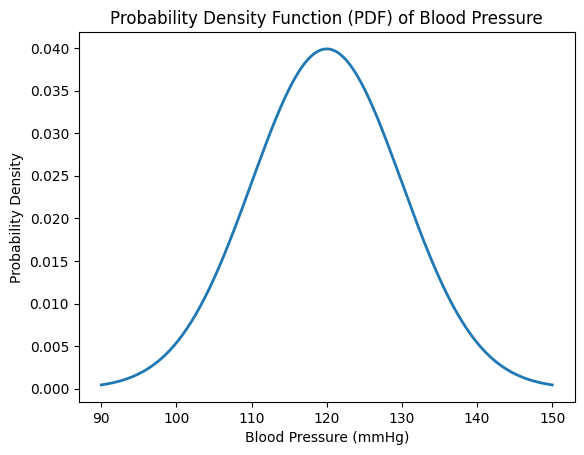

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 120  # Mean blood pressure (in mmHg)
sigma = 10  # Standard deviation of blood pressure (in mmHg)

# Generate a range of values for blood pressure
step_size = 0.2 
x = np.arange(90, 150 + step_size, step_size)

# Calculate the probability density function (PDF) of the Gaussian distribution
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# Plotting PDF
plt.plot(x, pdf, linewidth=2)
plt.title('Probability Density Function (PDF) of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.show()


Note X(s) is the blood pressure and the sample space S is, in principle, mmHg. Of course we are only plotting a range of the samples space (

What is the probability of 120 mmHg? Easy, we have to check the plot, right? Then, this is equal to 0.04, right?

 
**Actually,  no!**


As this is a probability density function it does not make sense to ask for a probability in a specific value. To obtain a probability we need to specify a range and then cumpute the area under the curve or that range or we can use the CDF.

## **A reminder of: Cumulative Distributive Functions (CDF)**

A cumulative distribution function (CDF) tells us the probability that a random variable takes on a value less than or equal to $x (F_x(x)=P(X\leq x))$. For example, suppose we roll a dice one time. If we let $x$ denote the number that dice lands on, then the cumulative distribution function for the outcome can be described as follows:

* $P(x\leq 0)$: 0

* $P(x\leq 1): \frac{1}{6}$

* $P(x\leq 2): \frac{2}{6}$

* $P(x\leq 3): \frac{3}{6}$

* $P(x\leq 4): \frac{4}{6}$

* $P(x\leq 5): \frac{5}{6}$

* $P(x\leq 6): \frac{6}{6}$

* $P(x>6): 0$



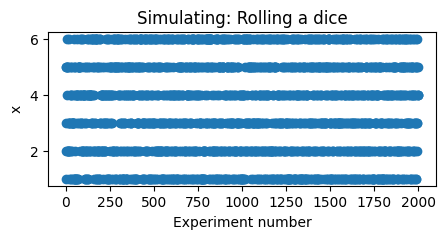

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain the cdf of rolling a dice with MATLAB
x = np.random.randint(1, 7, size=2000)

# Plotting the results
plt.plot(x, 'o')
plt.xlabel("Experiment number")
plt.ylabel("x")
#plt.xlim([0, 50])  # Uncomment if you want to set the x-axis limits
#plt.ylim([0.5, 6.5])  # Uncomment if you want to set the y-axis limits
plt.title("Simulating: Rolling a dice")
# Set figure size
figure_size = [500, 200]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()
plt.show()

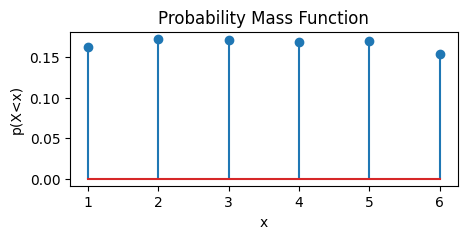

In [10]:
# Count the number of repeated elements using histogram
bin_edges = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
bin_counts, _ = np.histogram(x, bins=bin_edges) #calcular el número de elementos en cada intervalo
                                                #(bin_counts)basado en los valores de x
total_counts = np.sum(bin_counts)
pmf = bin_counts / total_counts
#La PMF representa la probabilidad de obtener un valor menor a x para cada intervalo.

# Plot the PMF
centers = (bin_edges[:-1] + bin_edges[1:]) / 2 #calculan el centro de cada intervalo dividiendo la suma
                                                #de los bordes inferiores y superiores entre 2
plt.stem(centers, pmf, markerfmt='o')
plt.xlabel("x")
plt.ylabel("p(X<x)")
plt.title("Probability Mass Function")

# Set figure size
figure_size = [500, 200]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()

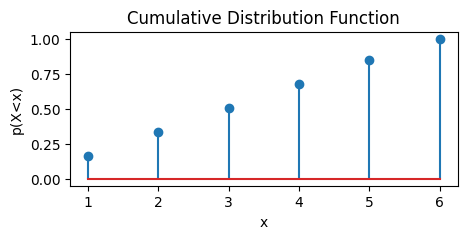

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the cumulative sum of bin counts
cdf = np.cumsum(pmf)

# Plot the CDF
plt.stem(centers, cdf, markerfmt='o')
plt.xlabel("x")
plt.ylabel("p(X<x)")
plt.title("Cumulative Distribution Function")

# Set figure size
figure_size = [500, 200]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()

Let's plot the CDF of our  blood pressure example.


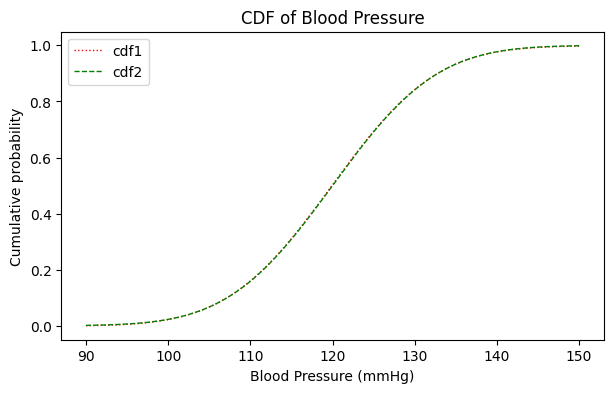

In [12]:
from scipy.special import erf

# Parameters
mu = 120  # Mean blood pressure (in mmHg)
sigma = 10  # Standard deviation of blood pressure (in mmHg)
step_size = 0.2  # Step size for visualization values
x = np.arange(90, 150 + step_size, step_size)

# Compute PDF and integrate for CDF (FIRST WAY)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
cdf1 = np.cumsum(pdf) * step_size
#multiplicar x step_size pq es probabilidad

# Compute CDF using analytical formula (SECOND WAY)
cdf2 = 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))

# Plotting CDF
plt.plot(x, cdf1, color='r', linestyle=':', linewidth=1)
plt.plot(x, cdf2, color='g', linestyle='--', linewidth=1)
plt.title('CDF of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cumulative probability')
plt.legend(['cdf1', 'cdf2'])

# Set figure size
figure_size = [700, 400]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()

## **What are random variables and processes?**
In general, real life applications are mode over a period of time and are influenced by random effects. Many physical phenomena encountered in nature are best characterized in statistical terms. For example:

* Meteorological phenomenon: air temperature and air pressure.

* Thermal noise voltage on an electronic devide (e.g. tv, radio, etc.)

* Wireless communication

* Others

A **random variable** is a rule (or function) that assigns a real number to every outcome of a random experiment, while a **random process** is a rule (or function) that assigns a time function to every outcome of a random experiment.

We can think of a random process as a collection of random variables indexed by time. It represents the evolution of a system over time in a probabilistic manner. 

Classic examples of random process:

* Rolling a die (we do not know the resultant number)

* Flipping a coin (we, normally, do not know the results: head or tail)



In [14]:
import random

# Simulate the process of rolling a die
n = random.randint(1, 6)
print(n)

# Simulate the process of flipping a coin
res = ["head", "tail"]
n = random.randint(0, 1)
print(res[n])

1
tail


Examples of random variables:

* Roll a die and look at what number is on the side that lands up. **Explanation:** rolling a die is the **random process** and the number on top is the value of the **random variable**.

* Flip a coin. **Explanation**: flipping the coin is the **random process** and the value is the **random variable**

More examples:


*   Noise Signal: Random processes are often used to model noise in signals. Explanation: Noise signal is the random process, the amplitude of the noise signal at each time is the random variable. Note that this amplitude can have a density function. In this case, if the density function is gaussian we say that we have a Gaussian noise.
*   Vibration: Vibration in mechanical systems can be modeled as a random process. Explanation: Vibration is the random process,  the instantaneous displacement or acceleration of the vibrating object at different points in time is the random variable. Note that factors such as excitation forces, system damping, and boundary conditions contribute to the random nature of the vibration.
*   Heart Rate Variability: Heart rate variability (HRV) refers to the variation in the time interval between consecutive heartbeats.  Explanation:  HRV is the random process, the duration between heartbeats at different time points is the random variable. Note that factors such as autonomic nervous system modulation and respiratory influences contribute to the variability and random natures observed in HRV.


A random process $X\left(s,t\right)$ is a set (ensemble) of random variables $(X(s))$ or $(X(s,t))$.  Random processes are functions of real variables, namely $s$ and $t$ where $s\in S$ (sample space) and $t\in T$ (parameter set or index set).

Let's review our previous examples with this notation in mind:



*   Roll a die and look at what number is on the side that lands up: $X(s,t)$ represents rolling a die. $X(s=s_o)$ represents the number on top. Note that $X(s)$ has a probability distribution. In the case of a fair die is a uniform mass function, as all values (from 1 to 6) have the same probability of appear on top of the dice. Here, the sample space S is {1, 2, 3, 4, 5, 6}.
*   Flip a coin: $X(s,t)$ represents flipping a coin. $X(s=s_o)$ represents the result (head or tail). Note that $X(s)$ has a probability distribution. In the case of a fair coin is a uniform mass function, as all values (head or tail) have the same probability of appear on top of the coin. Here, the sample space S is {H, T}
*   Noise Signal: $X(s,t)$ represents the signal. $X(s=s_o)$  represents the value of the signal at a specific time. Note that, $X(s)$ could have probability density function. For instance, $X(s)$  could have a gaussian density function. Here, the sample space S is the set of all possible real numbers (-∞, +∞).
*   Vibration: $X(s,t)$ represents the vibration. $X(s=s_o)$  represents the instantaneous displacement or acceleration of the vibrating object at different points in time. Note that, $X(s)$  could have probability density function. For instance, $X(s)$ could have a Rayleigh density function. Here, the sample space  for the displacement or acceleration at a given point in time can be a continuous range of real numbers (-∞, +∞).
*   Heart Rate Variability: $X(s,t)$  represents the HRV. $X(s=s_o)$ represents the duration between heartbeats at different time points. Note that, $X(s)$ could have probability density function. For instance, $X(s)$ could have a Gamma density function. Here, the sample space S for HRV consists of the set of all possible positive real numbers (0, +∞), representing the duration between heartbeats.



Usually, we drop the variable $s$ for notational convenience, so that the random process is denoted as $X(t)$ and a single realization is denoted as $x(t)$. However, we can analyze the classification of the random process before discarding the notation.

Consider also that:
* "discrete" or "continuous" will be used to refer to the nature of S
* "sequence" or "process" will be used to refer to the nature of T.



## **What are the classification of random processes?**
* If both $T$ and $S$ are discrete, the random process is called **discrete random sequence**. For example, if $X_n$ represents the outcome of the $n$-th toss of a fair dice, then {$X_n, n \geq1$} is a discrete random sequence, since $T=${1,2,3,...} and $S=${1,2,3,4,5,6}.

* If $T$ is discrete and $S$ is continuous, the random process is called a **continuous random sequence**. For example, if $X_n$ represents the temperature at the end of the $n$-th hour of a day, then {$X_n,1\leq n \leq24$} is continuous random sequence, since temperature can take any value in an interval and hence continuous.

* If $T$ is continuous and $S$ is discrete, the random process is called a **discrete random process**. For example, if $X(t)$ represents the number of the telephone calls received in the interval $(0,t)$ then {$X(t)$} is a discrete random process, since $S$={0,1,2,3,...}.

* If both $T$ and $S$ are continuous, the random process is called a **continuous random process**. For example, if $X(t)$ represents the maximum temperature at a place in the interval $(0,t)$, {$X(t)$} is a continuous random process.

## **Which parameters specify a random process?**

Consider a random process $X\left(t\right)$ (remember we have dropped s from $X\left(s,t\right)$)

Now, let the random process $X\left(t\right)$ be sampled at a time instant $t=t_i$ to get $X\left(t_i \right)$  (or $X\left(s,t=t_i \right)$) 


$X\left(t_i \right)$ is a random variable and let's say its PDF is $f\left(x\right)$. 

Then, the first moment of the random variable is defined as:

$E[X(t_i)]=\int_{-\infty}^\infty x_{t_i}f(x_{t_i})dx_{t_i}$

For a discrete random process with PMF $p\left(x\right)$, we have:

$E\{X(t_i)\}=\sum_{i=1}^n x_{t_i}p\left(x_{t_i}\right)$


**Example:**

You are investigating the electrical activity of the brain using electroencephalography (EEG) signals. One particular EEG signal of interest is modeled as a random process X(t) defined as:

X(t) = A cos(ωt + φ)

where A is a constant amplitude, ω is the angular frequency, t is the time variable, and φ is a random phase uniformly distributed between 0 and 2π.


*   **Compute the expectation of the process**





**Autocorrelation:** 

the auto-correlation function is simply the expected value of a product. Assuming a random process: $X\left(t\right)$ , the autocorrelation $\gamma_{\mathrm{xx}\;}$ can be calculated as:

$\gamma_{xx}(t, t-T)=\gamma_{xx}(T)=E\{X(t)X(t-T)\}$

In discrete-time:

$\gamma_{xx}[n, n-m]=\gamma_{xx}[m]=E\{X[n]X[n-m]\}$

**Example:**


*   **Compute the autocorrelation from previous example.**


**Strict sense stationary (SSS) process:**

A random process is said to be SSS if all its statistical properties are invariant to shifts in time. In other words, for a strictly stationary process, the joint probability distribution of any set of random variables taken from the process remains the same regardless of the time origin.

$P(X(t_1), X(t_2),\dots, X(t_n))=P(X(t_1+\tau),X(t_2+\tau),\dots,X(t_n+\tau))$

**Wide sense stationary (WSS) process:** 

a process is WSS if:

*   The mean E[X(t)] is constant for all values of t.
*   The autocorrelation depends only of the difference of instances 
X(t) = A cos(ωt + φ) is WSS


X(t) = A cos(ωt + φ) is WSS
